In [206]:
import pandas as pd
import json

In [207]:
data_df = pd.read_json('sectors.json')
data_df['sector_num'] = data_df['sectorcompleto'].apply(lambda x:int( x[-1]))
data_df.columns = [ 'sector', 'sector_num']

In [208]:
sector_corrections =[
      {
        "sector": 1,
        "lat_delta": 0.001,
        "long_delta": 0
      },
      {
        "sector": 2,
        "lat_delta": -0.001,
        "long_delta": -0.001
      },
      {
        "sector": 3,
        "lat_delta": -0.001,
        "long_delta": 0.001
      },
      {
        "sector": 4,
        "lat_delta": 0,
        "long_delta": 0
      }
    ]

,sector,sector_num,lat,long,value
0,JALZAP0940_1,1,20.719100,-103.389006,46.921944
1,JALZAP0940_2,2,20.717100,-103.390006,44.350941
2,JALZAP0940_3,3,20.717100,-103.388006,56.316000
3,JALZAP0941_1,1,20.794454,-103.478395,32.195973
4,JALZAP0941_2,2,20.792454,-103.479395,26.223337
...,...,...,...,...,...
347,JALZAP2953_2,2,20.726660,-103.431700,73.662594
348,JALZAP2953_3,3,20.726660,-103.429700,48.566932
349,JALZAP3320_1,1,20.672896,-103.430534,56.708429
350,JALZAP3320_2,2,20.670896,-103.431534,81.401597


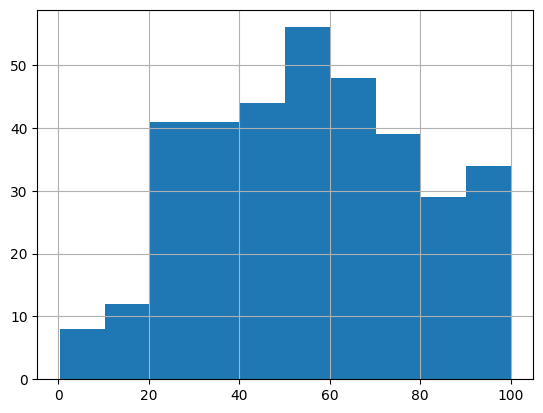

In [209]:
import random
import numpy as np

data = json.load(open('coords.json'))
def gen_new_dict(x):
    return {x["ATT_Cell_ID_Name"][3:-2]:[x["ept_Latitud"], x["ept_Longitud"]]}
coords = {}
for x in data:
    coords.update(gen_new_dict(x))

data_df['lat'] = data_df['sector'].apply(lambda x: coords[x][0] )
data_df['long'] = data_df['sector'].apply(lambda x: coords[x][1])
data_df['lat'] = data_df['lat'].astype(float) + data_df['sector_num'].apply(lambda x: sector_corrections[x-1]['lat_delta'])
data_df['long'] = data_df['long'].astype(float) + data_df['sector_num'].apply(lambda x: sector_corrections[x-1]['long_delta'])
data_df['value'] = data_df['sector'].apply(lambda x: np.clip(random.gauss(60,25),0,100))
data_df['value'].hist()
data_df

In [210]:
data_df.drop('sector_num', axis=1, inplace=True)
data_df['lat'] =data_df['lat'].astype(str)
data_df['long']  = data_df['long'].astype(str)
data = data_df.to_dict(orient='records')
a= json.dumps({"data":data}, indent=2)
with open('output.json', 'w') as f:
    f.write(a)


In [213]:
SECTORS = data_df.sector.to_list()

import random

# Function to split SECTORS into three categories
def split_sectors(sectors):
    random.shuffle(sectors)
    turn_off, turn_on, do_nothing = [], [], []

    for sector in sectors:
        choice = random.choice(["turn_off", "turn_on", "do_nothing"])
        if choice == "turn_off":
            turn_off.append(sector)
        elif choice == "turn_on":
            turn_on.append(sector)
        else:
            do_nothing.append(sector)

    return turn_off, turn_on, do_nothing

# Function to generate random failures
def generate_failures(sectors):
    num_failures = random.randint(1, len(sectors) // 100)  # Randomly select up to half of the sectors for failures
    return random.sample(sectors, num_failures)

# Split the SECTORS into categories
turn_off, turn_on, do_nothing = split_sectors(SECTORS)

# Count the sectors in each category
count_turn_off = len(turn_off)
count_turn_on = len(turn_on)
count_do_nothing = len(do_nothing)

# Generate a random set of failures from all the sectors
all_sectors = turn_off + turn_on + do_nothing
failures = generate_failures(all_sectors)

# Create the reports using mat_add_row_report

# General Report
general_report_fields = {
    "turn_off_count": {
        "type": "string",
        "value": f"Number of sectors to turn off: {count_turn_off}"
    },
    "turn_on_count": {
        "type": "string",
        "value": f"Number of sectors to turn on: {count_turn_on}"
    },
    "do_nothing_count": {
        "type": "string",
        "value": f"Number of sectors with no changes: {count_do_nothing}"
    },
    "failures_field": {
        "type": "string",
        "value": f"Total failures: {len(failures)}"
    }
}
failures_report_content = "\n".join(failures)

In [214]:
SECTORS

['JALZAP0954_1',
 'JALZAP2265_3',
 'JALZAP2041_3',
 'JALZAP0974_1',
 'JALZAP0972_2',
 'JALZAP0968_3',
 'JALZAP0980_2',
 'JALZAP0978_1',
 'JALZAP0940_3',
 'JALZAP0957_1',
 'JALZAP2025_3',
 'JALZAP1003_3',
 'JALZAP1054_3',
 'JALZAP1000_3',
 'JALZAP2024_2',
 'JALZAP1013_2',
 'JALZAP1037_3',
 'JALZAP0997_1',
 'JALZAP1037_1',
 'JALZAP2036_1',
 'JALZAP0966_1',
 'JALZAP0962_3',
 'JALZAP0945_3',
 'JALZAP0966_2',
 'JALZAP0990_1',
 'JALZAP2039_3',
 'JALZAP1042_3',
 'JALZAP1003_2',
 'JALZAP0956_1',
 'JALZAP0973_3',
 'JALZAP1031_1',
 'JALZAP1002_1',
 'JALZAP0958_2',
 'JALZAP0998_3',
 'JALZAP0967_3',
 'JALZAP1008_2',
 'JALZAP0940_1',
 'JALZAP1034_2',
 'JALZAP0964_3',
 'JALZAP0970_1',
 'JALZAP1025_2',
 'JALZAP0976_3',
 'JALZAP0972_3',
 'JALZAP1008_3',
 'JALZAP2043_2',
 'JALZAP1049_3',
 'JALZAP1051_2',
 'JALZAP2057_2',
 'JALZAP2055_2',
 'JALZAP0974_2',
 'JALZAP1059_2',
 'JALZAP1059_3',
 'JALZAP2039_1',
 'JALZAP0967_2',
 'JALZAP1014_2',
 'JALZAP1055_1',
 'JALZAP0944_3',
 'JALZAP1048_2',
 'JALZAP1027_1